In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouseMetadataPath = "data/Mouse_metadata.csv"
studyResultsPath = "data/Study_results.csv"

# Read the mouse data and the study results
mouseMetadata = pd.read_csv(mouseMetadataPath)
studyResults = pd.read_csv(studyResultsPath)

# Combine the data into a single dataset
studyDataComplete = pd.merge(studyResults, mouseMetadata, how="left", on="Mouse ID")

# Display the data table for preview
studyDataComplete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(studyDataComplete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = studyDataComplete.loc[studyDataComplete.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicateMouse

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = studyDataComplete.loc[studyDataComplete["Mouse ID"] == "g989"]
duplicateMouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyDataComplete.drop(studyDataComplete[studyDataComplete['Mouse ID'] == 'g989'].index, inplace=True)
studyDataComplete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(studyDataComplete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = studyDataComplete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = studyDataComplete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = studyDataComplete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sds = studyDataComplete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = studyDataComplete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summaryTable = pd.DataFrame({
    "Mean Tumor Volume" : means,
    "Median Tumor Volume" : median,
    "Tumor Volume Variances" : variance,
    "Tumor Volume Std Dev" : sds,
    "Tumor volumne Std Err" : sems
})
summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variances,Tumor Volume Std Dev,Tumor volumne Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = studyDataComplete.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean","median","var","std","sem"]
})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

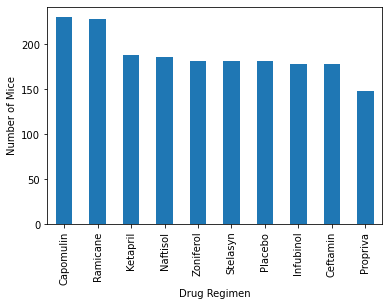

In [9]:
#Bar plot showing total number of timepoints for all mice for each drug using pandas
counts = studyDataComplete["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

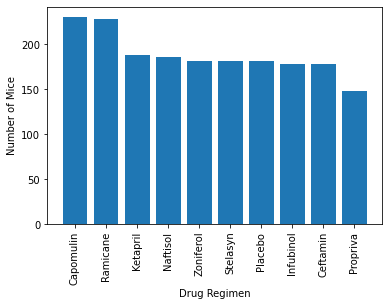

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index.values,counts.values)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()

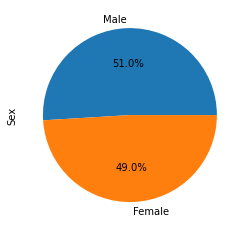

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = studyDataComplete["Sex"].value_counts()
counts.plot(kind="pie",autopct="%1.1f%%")
plt.show()

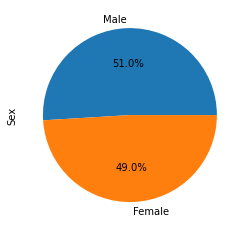

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values,labels=counts.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Drugs = studyDataComplete[(studyDataComplete["Drug Regimen"] == "Ceftamin")|
                          (studyDataComplete["Drug Regimen"] == "Infubinol")|
                          (studyDataComplete["Drug Regimen"] == "Ramicane")|
                          (studyDataComplete["Drug Regimen"] == "Capomulin")
                         ]
lastTimepoint = Drugs.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MergedDF = pd.merge(lastTimepoint,studyDataComplete, on=["Mouse ID", "Timepoint"], how="left")
MergedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ["Ceftamin","Infubinol","Ramicane","Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drugList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVolume = MergedDF.loc[MergedDF["Drug Regimen"] == d, :]
    
    # add subset 
    tumorVolData.append(tumorVolume["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    iqr = quartiles[0.75]-quartiles[0.25]
    
    lowerbound = quartiles[0.25]-(1.5*iqr)
    upperbound = quartiles[0.75]+(1.5*iqr)

    outliers = tumorVolume.loc[(tumorVolume["Tumor Volume (mm3)"] > upperbound) | 
                                (tumorVolume["Tumor Volume (mm3)"] < lowerbound)]
    print(f"{d}'s the potential outliers are: \n\t{outliers}")

Ceftamin's the potential outliers are: 
	Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Infubinol's the potential outliers are: 
	   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
Ramicane's the potential outliers are: 
	Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Capomulin's the potential outliers are: 
	Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


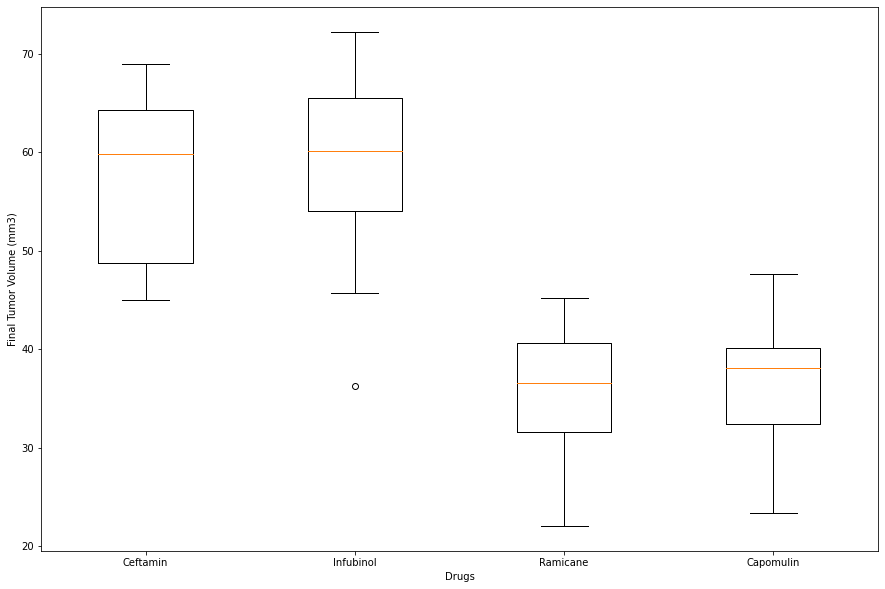

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xlabel("Drugs")
plt.ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumorVolData, labels=drugList)
plt.show()

## Line and Scatter Plots

In [16]:
#Filtered data for Capomulin
capomulinTable = studyDataComplete.loc[studyDataComplete['Drug Regimen'] == 'Capomulin']
capomulinTable.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


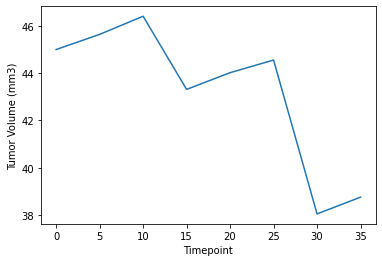

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capMouseData = capomulinTable.loc[capomulinTable["Mouse ID"] == "j246"]
plt.plot(capMouseData["Timepoint"],capMouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [18]:
capomulinAverage = capomulinTable.groupby("Mouse ID").mean()
capomulinAverage.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


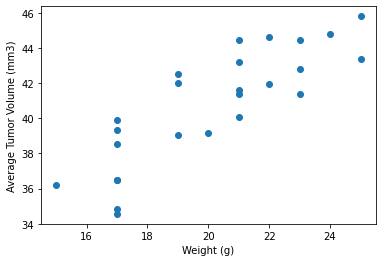

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulinAverage["Weight (g)"],capomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

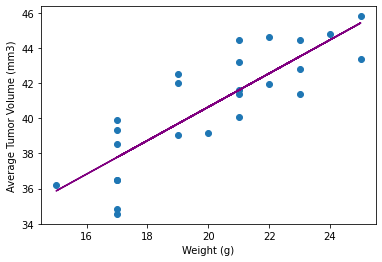

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulinAverage["Weight (g)"],capomulinAverage["Tumor Volume (mm3)"])[0],2)

model = st.linregress(capomulinAverage["Weight (g)"],capomulinAverage["Tumor Volume (mm3)"])

yValues = capomulinAverage["Weight (g)"] * model[0] + model[1] 

#re-draw scatter plot
plt.scatter(capomulinAverage["Weight (g)"],capomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#draw line with linregress
plt.plot(capomulinAverage["Weight (g)"],yValues, color="purple")

plt.show()